##Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

##Data Pre-processing

In [ ]:

df = pd.read_csv("fake reviews dataset.csv")
df


NameError: ignored

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df['label'].value_counts()

In [ ]:
df.rename(columns = {'text_':'review_text'}, inplace = True)

In [ ]:
df = df.replace({'label': {'CG': 1, 'OR': 0}})

In [ ]:
text = df['review_text'].copy()

In [ ]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
# import these modules
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
corpus = []
for i in range(0, len(text)):
    review = re.sub('[^a-zA-Z]', ' ', text[i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## CounterVectorizer

In [ ]:
## Applying Countvectorizer
# ngram_range=(1,3)
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(40432, 10000)

In [ ]:
y = df['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
cv.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aa batteri',
 'aaa',
 'ab',
 'abandon',
 'abil',
 'abl',
 'abl find',
 'abl get',
 'abl go',
 'abl make',
 'abl put',
 'abl read',
 'abl see',
 'abl take',
 'abl use',
 'abl wear',
 'abrupt',
 'absolut',
 'absolut love']

##Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##MultinomialNB

accuracy:   0.869
Confusion matrix, without normalization


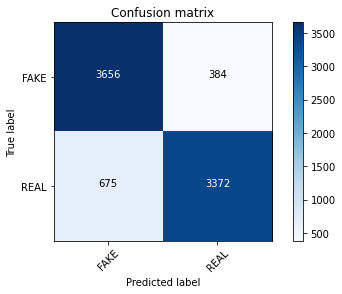

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_clf = MultinomialNB(alpha=alpha)
  sub_clf.fit(X_train,y_train)
  y_pred = sub_clf.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  if score>previous_score:
    classifier=sub_clf
  print("Alpha: {}, Score: {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score: 0.8681835043897613
Alpha: 0.1, Score: 0.8713985408680599
Alpha: 0.2, Score: 0.8710275751205638
Alpha: 0.30000000000000004, Score: 0.8710275751205638
Alpha: 0.4, Score: 0.8702856436255719
Alpha: 0.5, Score: 0.8700383331272412
Alpha: 0.6000000000000001, Score: 0.8702856436255719
Alpha: 0.7000000000000001, Score: 0.8697910226289106
Alpha: 0.8, Score: 0.8695437121305799
Alpha: 0.9, Score: 0.869172746383084


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4040
           1       0.90      0.83      0.86      4047

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier #
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7573884011376283


accuracy:   0.757
Confusion matrix, without normalization


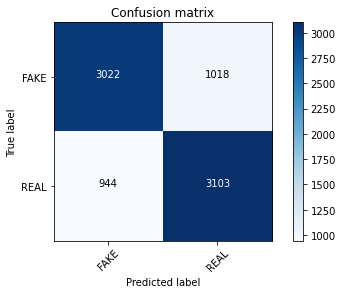

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)# Evaluate our model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      4040
           1       0.75      0.77      0.76      4047

    accuracy                           0.76      8087
   macro avg       0.76      0.76      0.76      8087
weighted avg       0.76      0.76      0.76      8087



##Linear SVC

accuracy:   0.900
Confusion matrix, without normalization


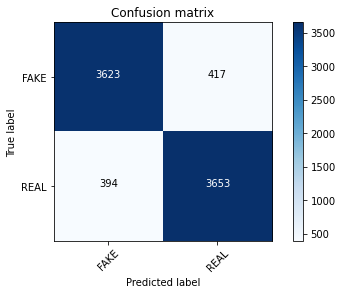

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import metrics
import numpy as np
import itertools
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)# Evaluate our model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4040
           1       0.90      0.90      0.90      4047

    accuracy                           0.90      8087
   macro avg       0.90      0.90      0.90      8087
weighted avg       0.90      0.90      0.90      8087



## Grid SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")


param_grid = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid','linear']}


In [ ]:
from sklearn.svm import SVC 
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernals[i], "kernel")
    print(classification_report(y_test,y_pred))

NameError: ignored

##ADABOOST

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import LinearSVC
abc = AdaBoostClassifier(LinearSVC(),n_estimators=500,learning_rate=1.0,algorithm="SAMME")

abc.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred = abc.predict(X_test)# Evaluate our model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4040
           1       0.89      0.89      0.89      4047

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087



Confusion matrix, without normalization


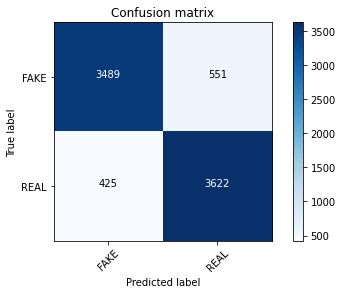

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC 


grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
gridcv = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=SVC(kernel='linear', gamma="auto")),
                    param_grid=grid,
                    refit='f1',
                    cv=kfold,
                    verbose=0
                    )
gridcv.fit(X_train, y_train)
y_pred = grid.predict(X_test)



In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


ABC = AdaBoostClassifier(base_estimator=,n_estimators=600,learning_rate=1.5,algorithm="SAMME")


#clf = AdaBoostClassifier(base_estimator=LinearSVC(), n_estimators=100,learning_rate=1,algorithm="SAMME",random_state=42)
ABC.fit(X_train,y_train)



In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

##XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import re
xgb = XGBClassifier(booster='gblinear')

X = XGBClassifier()
X.fit(X_train,y_train)

y_pred = X.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3376  664]
 [1075 2972]]
0.7849635217014962
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4040
           1       0.82      0.73      0.77      4047

    accuracy                           0.78      8087
   macro avg       0.79      0.79      0.78      8087
weighted avg       0.79      0.78      0.78      8087



#TF-IDF Vectorizer

In [ ]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=10000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = df['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [5, 10], 'max_features': [5, 10], 
 'max_depth': [5, 10, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=10, 
                           n_informative=2, n_redundant=0, 
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=300, criterion='gini', max_features='sqrt', min_samples_leaf=10)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=300, random_state=0)

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomForestClassifier()
rf_randomcv.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=rf_randomcv.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[3579  461]
 [ 640 3407]]
Accuracy Score 0.8638555706689749
Classification report:               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4040
           1       0.88      0.84      0.86      4047

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



accuracy:   0.740
Confusion matrix, without normalization


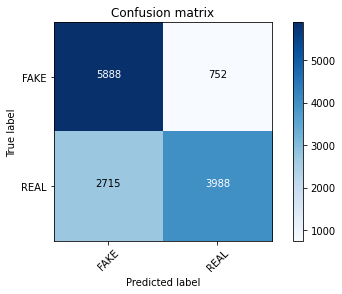

In [ ]:
from sklearn import metrics
import numpy as np
import itertools
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.867
Confusion matrix, without normalization


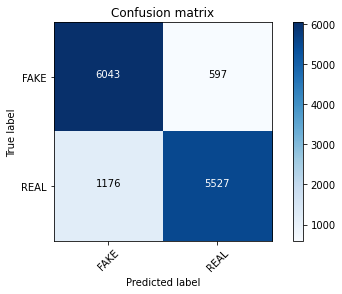

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Accuracy: 0.7382897399385445
accuracy:   0.738
Confusion matrix, without normalization


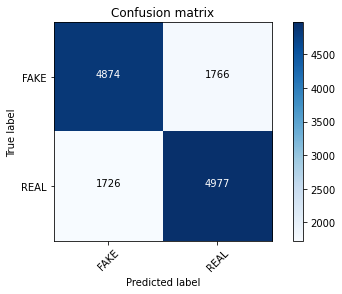

In [ ]:
from sklearn.tree import DecisionTreeClassifier #
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import metrics


kernel = ['linear','rbf','poly']
for i in kernel:
  svc = LinearSVC(kernel=i, C=1.0)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)
  print("accuracy:   %0.3f" % score)
  cm = metrics.confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

TypeError: ignored

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size = 5000
onehot_repr = [one_hot(words, voc_size) for words in corpus]
# onehot_repr
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen=sent_length)
# print(embedded_docs)

NameError: ignored

In [ ]:
embedding_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_feature, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state=42)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size=64)

In [ ]:
from tensorflow.keras.layers import Dropout
embedding_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_feature, input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size=64)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)